# **Lab Quiz 3: EDA in Titanic**
Using the dataset of Titanic, prove your answer for the following questions using Seaborn visualization in Google Colab:

1. What is the distribution of passengers by class?
2. What is the age distribution of passengers?
3. How does age vary across passenger classes?
4. What percentage of passengers survived, by class or gender?
5. What is the survival distribution across classes, separated by gender?
6. Who survived, grouped by gender?
7. What’s the fare distribution for different classes, split by survival?
8. How does family size (SibSp -Siblings/Spouse or Parch - Parent/Children) differ across survival outcomes, by gender?

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Execute the df.info to check data types
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# Create another column family_size
titanic['family_size'] = titanic['sibsp'] + titanic['parch']
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


In [ ]:
# Check if you have null values
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
# Data Cleaning of Null Values: Age
titanic['age'].fillna(titanic['age'].mean(), inplace=True)

/tmp/ipython-input-6-4040370562.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].mean(), inplace=True)


In [ ]:
# Data Cleaning of Null Values: Embarked
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

/tmp/ipython-input-7-3022755554.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)


In [ ]:
# Data Cleaning of Null Values: Deck
titanic['deck'].fillna(titanic['deck'].mode()[0], inplace=True)

/tmp/ipython-input-8-468664679.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['deck'].fillna(titanic['deck'].mode()[0], inplace=True)


In [ ]:
# Data Cleaning of Null Values: embark_town
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

/tmp/ipython-input-9-2848717354.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)


In [ ]:
# Checking if you have null values after data cleaning
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
# Drop duplicate data
titanic.drop_duplicates(inplace=True)

In [ ]:
# Describe numerical data
titanic.describe()

,survived,pclass,age,sibsp,parch,fare,family_size
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,0.412516,2.245211,29.805270,0.523627,0.416347,34.722163,0.939974
std,0.492602,0.854445,13.684358,0.986684,0.837325,52.192674,1.518083
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,22.000000,0.000000,0.000000,8.050000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,15.900000,0.000000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.197900,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


In [ ]:
# Descibe categorical data
titanic.describe(include='object')

,sex,embarked,who,embark_town,alive
count,783,783,783,783,783
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,490,569,450,569,460


## **Actual Output**

### **Task 1: What is the distribution of passengers by class?**

Text(0.5, 1.0, 'Distribution of Passengers by Class')

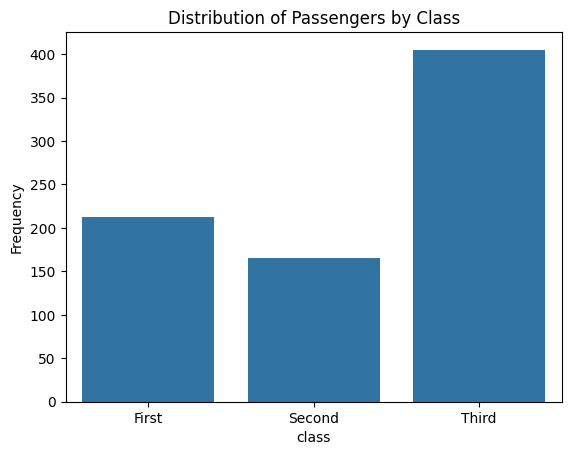

In [ ]:
# Distribution of passengers by class
g = sns.countplot(x='class', data=titanic)
g.set_ylabel('Frequency')
g.set_title('Distribution of Passengers by Class')

### **Task 2: What is the age distribution of passengers?**

Text(0.5, 1.0, 'Age Distribution of Passengers')

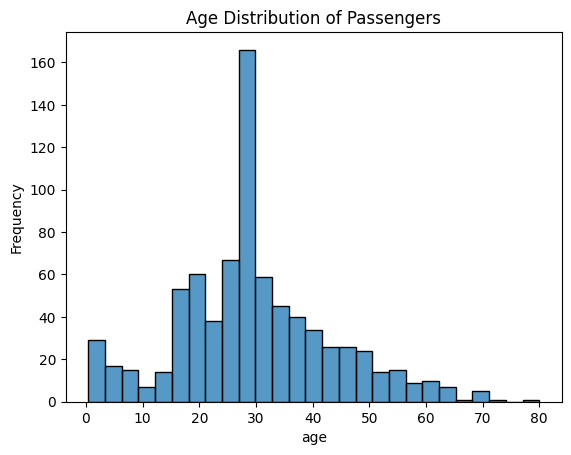

In [ ]:
# Age distribution of passengers
g = sns.histplot(x='age', data=titanic)
g.set_ylabel('Frequency')
g.set_title('Age Distribution of Passengers')

### **Task 3: How does age vary across passenger classes?**

Text(0.5, 1.0, 'Age Variation Across Passenger Classes')

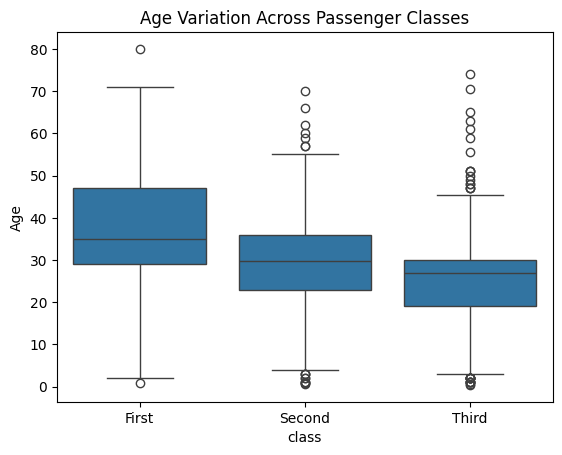

In [ ]:
# Boxplot of age distribution across different classes
g = sns.boxplot(x='class', y='age', data=titanic)
g.set_ylabel('Age')
g.set_title('Age Variation Across Passenger Classes')

### **Task 4: What percentage of passengers survived, by class or gender?**

/tmp/ipython-input-17-2417129032.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['class', 'sex'])['survived']


Text(0.5, 1.0, 'Survival Percentage by Class and Gender')

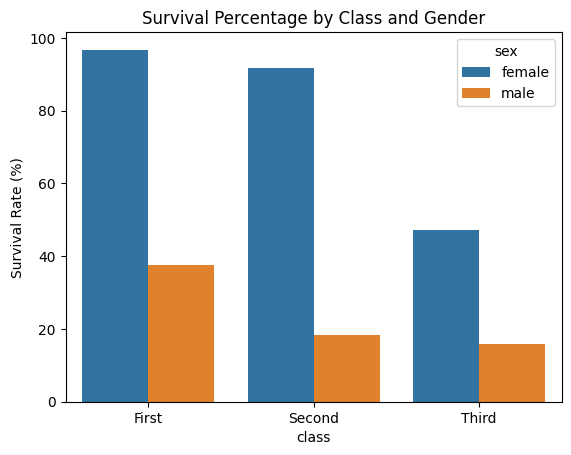

In [ ]:
# Percentage of passengers survived, by class or gender

survival_rates = (
    titanic
    .groupby(['class', 'sex'])['survived']
    .mean()
    .reset_index()
)

survival_rates['survived'] *= 100

g = sns.barplot(x='class', y='survived', hue='sex', data=survival_rates)
g.set_ylabel('Survival Rate (%)')
g.set_title('Survival Percentage by Class and Gender')

### **Task 5: What is the survival distribution across classes, separated by gender?**

Text(0.5, 1.0, 'Survival Distribution Across Classes, Separated by Gender')

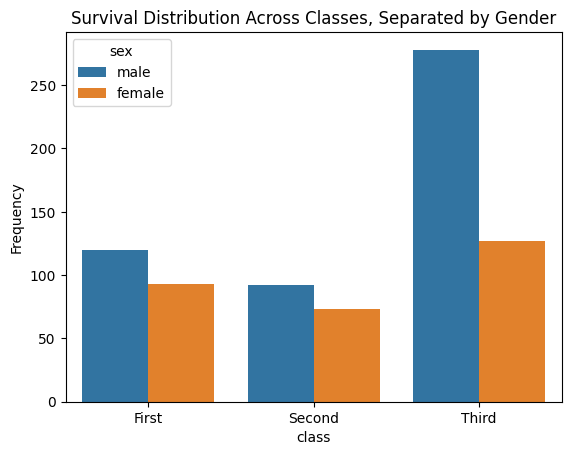

In [ ]:
# Survival distribution across classes, separated by gender
g = sns.countplot(x='class', hue='sex', data=titanic)
g.set_ylabel('Frequency')
g.set_title('Survival Distribution Across Classes, Separated by Gender')

### **Task 6: Who survived, grouped by gender?**

Text(0.5, 1.0, 'Survival Status Grouped by Gender')

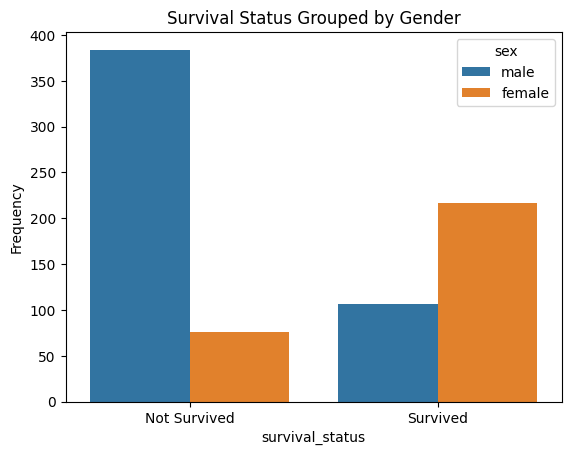

In [ ]:
# Survived passengers grouped by gender

# Map 0 and 1 to descriptive labels
titanic['survival_status'] = titanic['survived'].map({0: 'Not Survived', 1: 'Survived'})

# Plot survival status grouped by gender
g = sns.countplot(x='survival_status', hue='sex', data=titanic)
g.set_ylabel('Frequency')
g.set_title('Survival Status Grouped by Gender')

### **Task 7: What’s the fare distribution for different classes, split by survival?**

Text(0.5, 1.0, 'Fare Distribution for Different Classes, Split by Survival (True/False)')

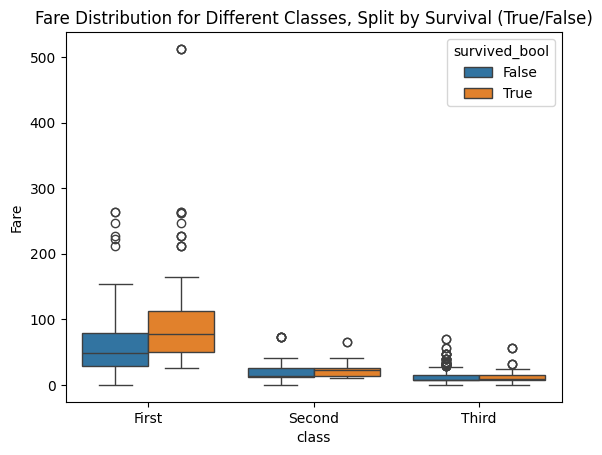

In [ ]:
# Fare distribution for different classes, split by survival

# Map 0 and 1 to False and True
titanic['survived_bool'] = titanic['survived'].map({0: False, 1: True})

# Fare distribution for different classes, split by survival
g = sns.boxplot(x='class', y='fare', hue='survived_bool', data=titanic)
g.set_ylabel('Fare')
g.set_title('Fare Distribution for Different Classes, Split by Survival (True/False)')

### **Task 8: How does family size (SibSp -Siblings/Spouse or Parch - Parent/Children) differ across survival outcomes, by gender?**

Text(0.5, 1.0, 'Family Size Variation Across Survival Outcomes, by Gender')

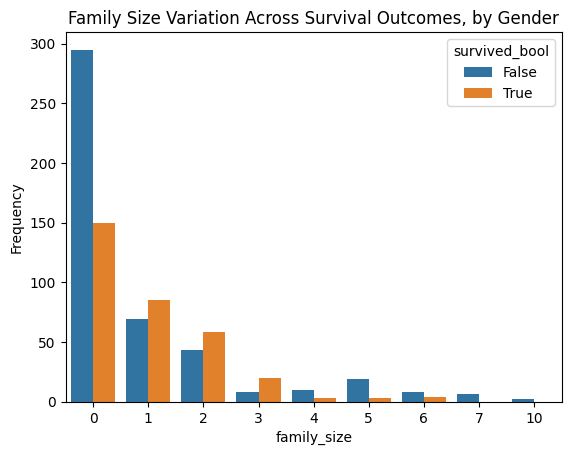

In [ ]:
# How does family size (SibSp -Siblings/Spouse or Parch - Parent/Children) differ across survival outcomes, by gender
# Map 0 and 1 to False and True
titanic['survived_bool'] = titanic['survived'].map({0: False, 1: True})

g = sns.countplot(x='family_size', hue='survived_bool', data=titanic)
g.set_ylabel('Frequency')
g.set_title('Family Size Variation Across Survival Outcomes, by Gender')